## Communicating Data Findings: Prosper Loan Data

Prepared by: Piyush Kumar

#### Loading the Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#### Reading the Data:

In [2]:
#reading the dataset prosperLoanData.csv and saving into the dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


#### Assesing the Data: 

In [3]:
#getting the shape of the dataset
loan.shape

(113937, 81)

In [4]:
# getting the broad view of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

- We have too many columns(81), let's cut down a few variables. A brief description of dataset column variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [5]:
# I'll be using only these variables for my further analysis. 
new_columns= ['ListingNumber', 
              'ListingCreationDate',
              'CreditGrade',
              'Term',
              'LoanStatus',
              'ClosedDate',
              'BorrowerAPR',
              'BorrowerRate',
              'EstimatedEffectiveYield',
              'EstimatedLoss',
              'EstimatedReturn',
              'ProsperRating (numeric)',
              'ProsperRating (Alpha)', 
              'ProsperScore',
              'ListingCategory (numeric)',
              'BorrowerState',
              'Occupation',
              'EmploymentStatus',
              'EmploymentStatusDuration',
              'IsBorrowerHomeowner',
              'DebtToIncomeRatio',
              'IncomeRange',
              'IncomeVerifiable',
              'StatedMonthlyIncome',
              'TotalProsperLoans',
              'OnTimeProsperPayments',
              'ProsperPaymentsOneMonthPlusLate',
              'LoanOriginalAmount',
              'LoanOriginationDate',
              'MonthlyLoanPayment',
              'PercentFunded',
              'Recommendations',
              'Investors']

# let's create a dataframe with the above variables only:
loan=loan[new_columns]
#checking for the chnages
loan.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'TotalProsperLoans', 'OnTimeProsperPayments',
       'ProsperPaymentsOneMonthPlusLate', 'LoanOriginalAmount',
       'LoanOriginationDate', 'MonthlyLoanPayment', 'PercentFunded',
       'Recommendations', 'Investors'],
      dtype='object')

In [6]:
#let's get the broad view of our new dataset. 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 33 columns):
ListingNumber                      113937 non-null int64
ListingCreationDate                113937 non-null object
CreditGrade                        28953 non-null object
Term                               113937 non-null int64
LoanStatus                         113937 non-null object
ClosedDate                         55089 non-null object
BorrowerAPR                        113912 non-null float64
BorrowerRate                       113937 non-null float64
EstimatedEffectiveYield            84853 non-null float64
EstimatedLoss                      84853 non-null float64
EstimatedReturn                    84853 non-null float64
ProsperRating (numeric)            84853 non-null float64
ProsperRating (Alpha)              84853 non-null object
ProsperScore                       84853 non-null float64
ListingCategory (numeric)          113937 non-null int64
BorrowerState          

In [7]:
#let's remove the space from the variable names and make it more consistent with other variable names.
loan.rename(columns={'ProsperRating (Alpha)': 'ProsperRatingAlpha', 
                        'ProsperRating (numeric)': 'ProsperRatingNumeric',
                        'ListingCategory (numeric)' : 'ListingCategoryNumeric'
                       }, inplace=True)

In [8]:
#checking for changes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 33 columns):
ListingNumber                      113937 non-null int64
ListingCreationDate                113937 non-null object
CreditGrade                        28953 non-null object
Term                               113937 non-null int64
LoanStatus                         113937 non-null object
ClosedDate                         55089 non-null object
BorrowerAPR                        113912 non-null float64
BorrowerRate                       113937 non-null float64
EstimatedEffectiveYield            84853 non-null float64
EstimatedLoss                      84853 non-null float64
EstimatedReturn                    84853 non-null float64
ProsperRatingNumeric               84853 non-null float64
ProsperRatingAlpha                 84853 non-null object
ProsperScore                       84853 non-null float64
ListingCategoryNumeric             113937 non-null int64
BorrowerState          

In [9]:
#checking for duplicate rows.
loan.duplicated().sum()

0

- Good thing that there are no duplicate rows. We have null values though. Since almost all of the columns contains null values, we might lose all of the data if we try to remove the rows with null values in any column. Also, this project is more about visualizations so let's keep them as is.

In [10]:
# let's get the basic summary statistics of our new dataset. 
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRatingNumeric,ProsperScore,ListingCategoryNumeric,...,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsOneMonthPlusLate,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,...,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,...,0.275947,5.608026e+03,1.421100,22.271949,0.048540,8337.01385,272.475783,0.998584,0.048027,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,...,0.551759,7.478497e+03,0.764042,18.830425,0.556285,6245.80058,192.697812,0.017919,0.332353,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.000000,0.700000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,...,0.140000,3.200333e+03,1.000000,9.000000,0.000000,4000.00000,131.620000,1.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,...,0.220000,4.666667e+03,1.000000,15.000000,0.000000,6500.00000,217.740000,1.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,...,0.320000,6.825000e+03,2.000000,32.000000,0.000000,12000.00000,371.580000,1.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,...,10.010000,1.750003e+06,8.000000,141.000000,21.000000,35000.00000,2251.510000,1.012500,39.000000,1189.000000


In [11]:
# let's change the datatype of the variable 'Term' to object instead of int.
# And, ListingCreationDate, LoanOriginationDate and ClosedDate to datetime datatype.

loan['Term'] = loan['Term'].astype('object')
loan['ListingCreationDate'] = loan['ListingCreationDate'].astype('datetime64')
loan['ClosedDate'] = pd.to_datetime(loan['ClosedDate'])
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])

In [12]:
#checking for changes made
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 33 columns):
ListingNumber                      113937 non-null int64
ListingCreationDate                113937 non-null datetime64[ns]
CreditGrade                        28953 non-null object
Term                               113937 non-null object
LoanStatus                         113937 non-null object
ClosedDate                         55089 non-null datetime64[ns]
BorrowerAPR                        113912 non-null float64
BorrowerRate                       113937 non-null float64
EstimatedEffectiveYield            84853 non-null float64
EstimatedLoss                      84853 non-null float64
EstimatedReturn                    84853 non-null float64
ProsperRatingNumeric               84853 non-null float64
ProsperRatingAlpha                 84853 non-null object
ProsperScore                       84853 non-null float64
ListingCategoryNumeric             113937 non-null int64
Borrow

- We have variables with three differnet datatypes. Let's identify them and group them.

In [13]:
#numerical variables
num_loan=loan.select_dtypes(include=[np.number, np.datetime64])
num_loan.columns

Index(['ListingNumber', 'ListingCreationDate', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingNumeric', 'ProsperScore',
       'ListingCategoryNumeric', 'EmploymentStatusDuration',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'OnTimeProsperPayments', 'ProsperPaymentsOneMonthPlusLate',
       'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment',
       'PercentFunded', 'Recommendations', 'Investors'],
      dtype='object')

In [14]:
#Categorical variables
cat_loan=loan.select_dtypes(include=['object'])
cat_loan.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ProsperRatingAlpha',
       'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange'],
      dtype='object')

In [15]:
#boolean variables
bool_loan=loan.select_dtypes(include=['bool'])
bool_loan.columns

Index(['IsBorrowerHomeowner', 'IncomeVerifiable'], dtype='object')

**What is the structure of this dataset?**

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, employment status, homeownership, Prosper Ratings, Credit Score, Credit Rating, Payment Information and many others.
We have too many for the purpose of visualization, I have cut down a few variables.

**What is/are the main feature(s) of interest in your dataset?**

What factors are responsible for Loan Grant. We would also be looking for any specific relationship between these variables. 

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

Borrower information occupation, income, Home ownership , Employment Status, prosper rating and Loan Status will be major contributing factors. 

### Univariate Analysis:

#### Categorical Variables:

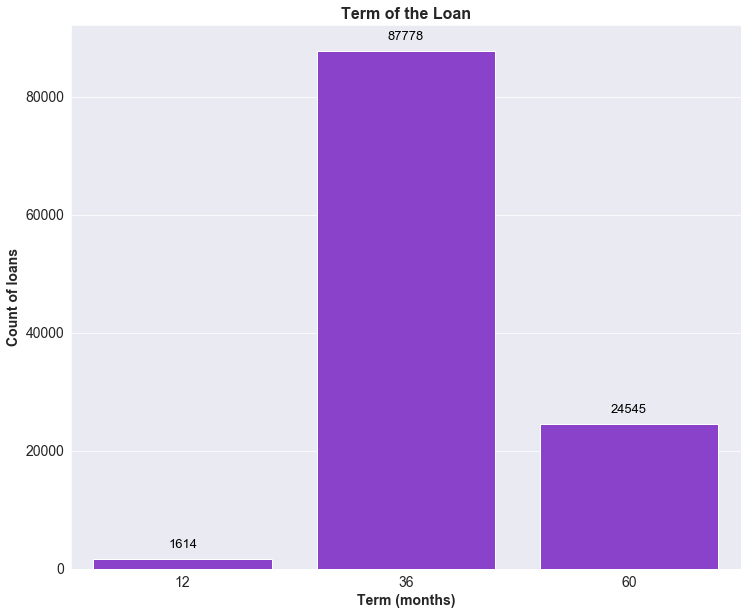

In [16]:
plt.subplots(figsize=(12,10))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.Term.value_counts().index, cat_loan.Term.value_counts(), color=sns.color_palette()[4])
plt.title('Term of the Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Term (months)',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='top', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

- Most of the loans has term of 36 months. 

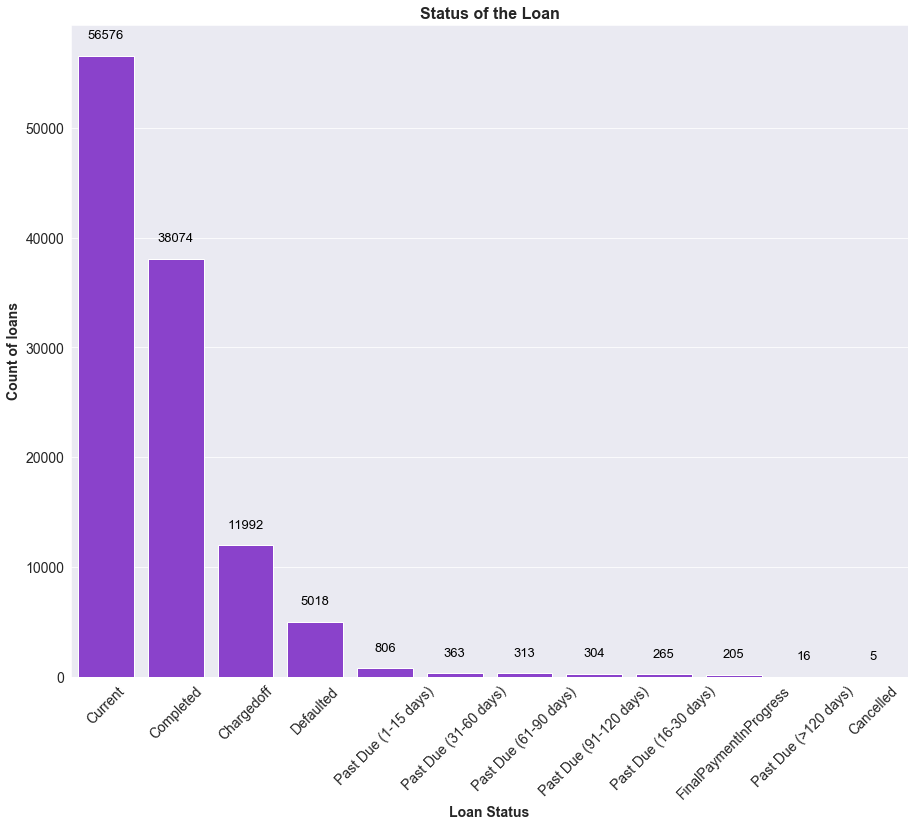

In [17]:
plt.subplots(figsize=(15,12))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.LoanStatus.value_counts().index, cat_loan.LoanStatus.value_counts(), color=sns.color_palette()[4])
plt.title('Status of the Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Loan Status',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14, rotation=45) 
plt.yticks(fontsize=14);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')


- Although, a good no. of loans have been completed, most are still are current.

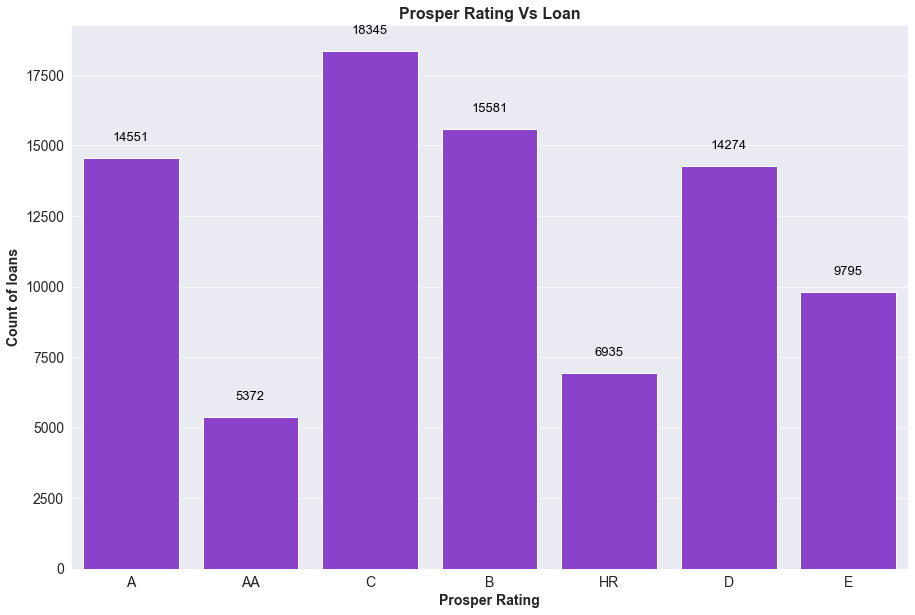

In [18]:
plt.subplots(figsize=(15,10))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.ProsperRatingAlpha.value_counts(sort=False, dropna=False).index, cat_loan.ProsperRatingAlpha.value_counts(sort=False,dropna=False), color=sns.color_palette()[4])
plt.title('Prosper Rating Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Prosper Rating',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')


- Among the rated loans, A, B, C and D ratings are most prevalent.  

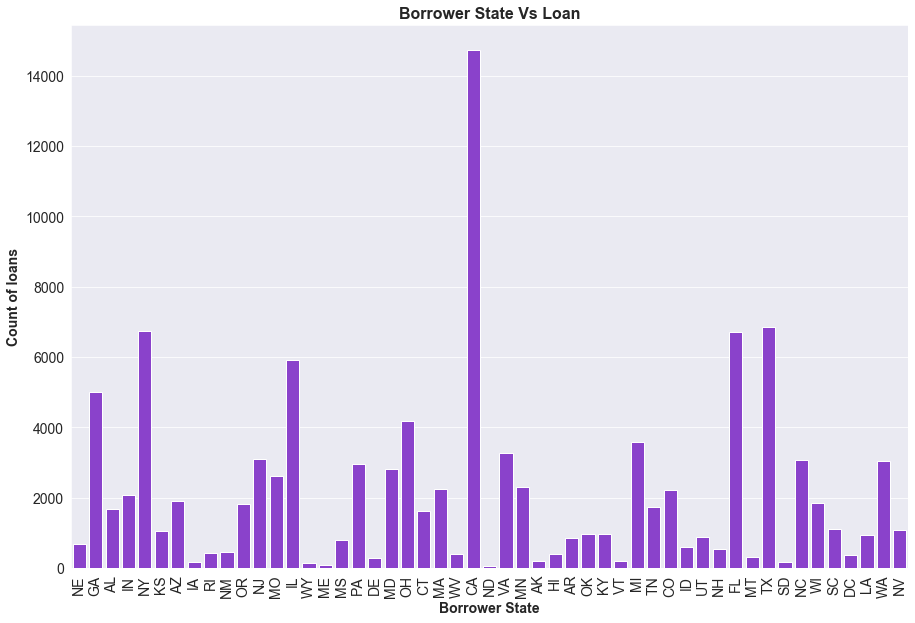

In [19]:
plt.subplots(figsize=(15,10))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.BorrowerState.value_counts(sort=False, dropna=False).index, cat_loan.BorrowerState.value_counts(sort=False,dropna=False), color=sns.color_palette()[4])
plt.title('Borrower State Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Borrower State',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14, rotation= 90) 
plt.yticks(fontsize=14);

- Notably, most of the borrowers live in CA, followed by TX, NY, FL and IL.

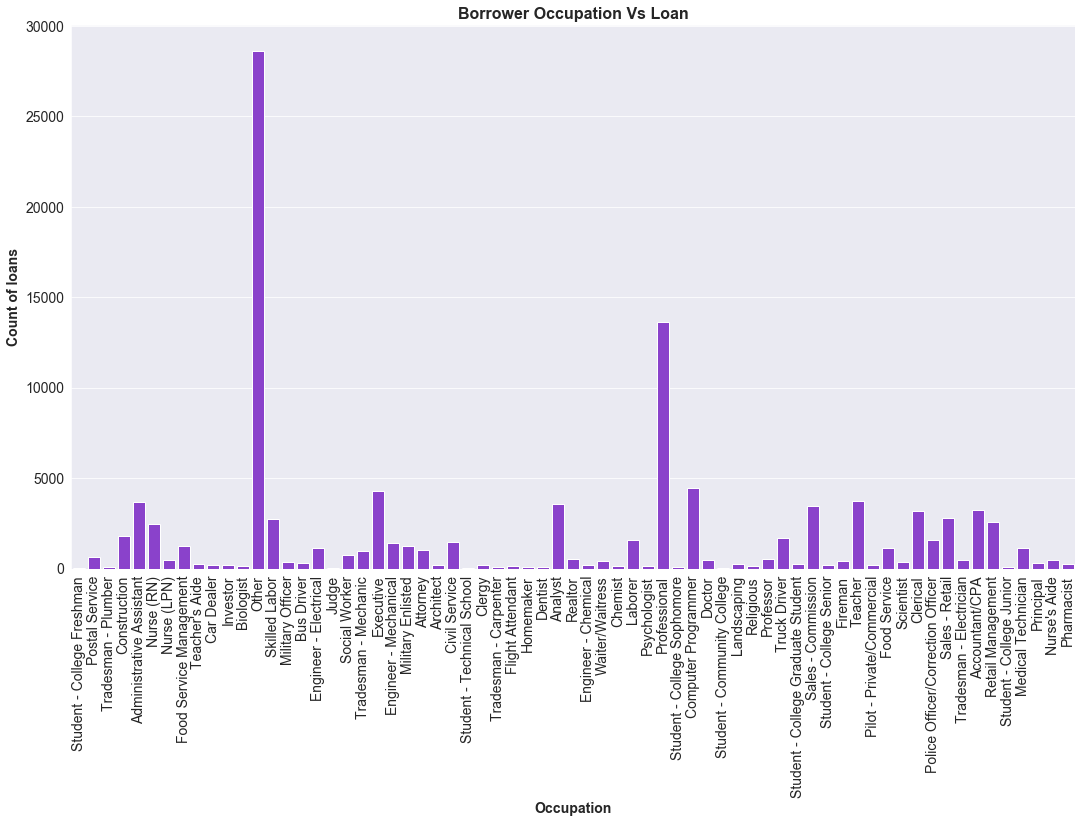

In [20]:
plt.subplots(figsize=(18,10))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.Occupation.value_counts(sort=False, dropna=False).index, cat_loan.Occupation.value_counts(sort=False,dropna=False), color=sns.color_palette()[4])
plt.title('Borrower Occupation Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Occupation',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14,rotation=90) 
plt.yticks(fontsize=14);

- Most of the borrowers fall under Others category though a many of them have said they're professional.

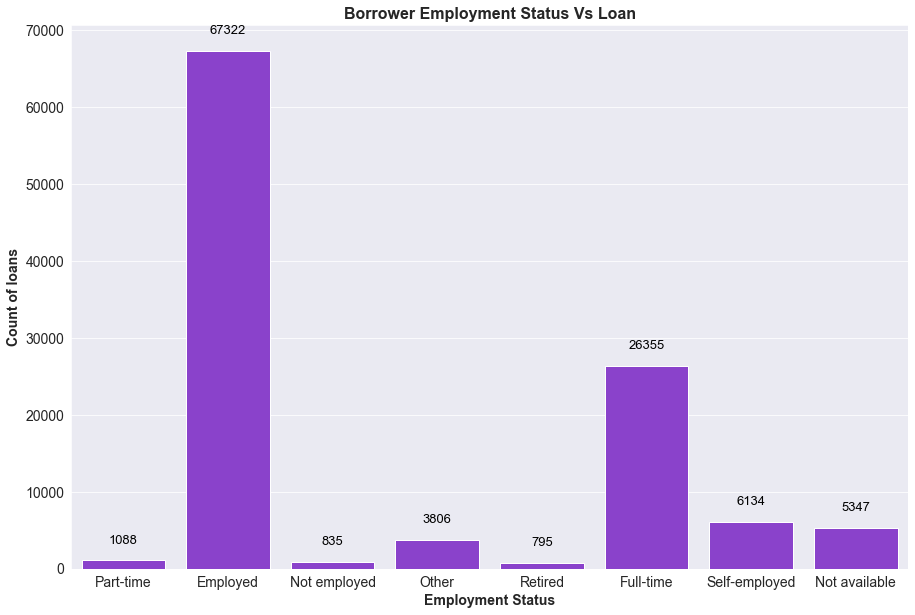

In [21]:
plt.subplots(figsize=(15,10))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.EmploymentStatus.value_counts(sort=False, dropna=False).index, cat_loan.EmploymentStatus.value_counts(sort=False,dropna=False), color=sns.color_palette()[4])
plt.title('Borrower Employment Status Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Employment Status',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')


- Most of the borrowers are employed and only a few hundreds are unemployed, which is a healthy sign.

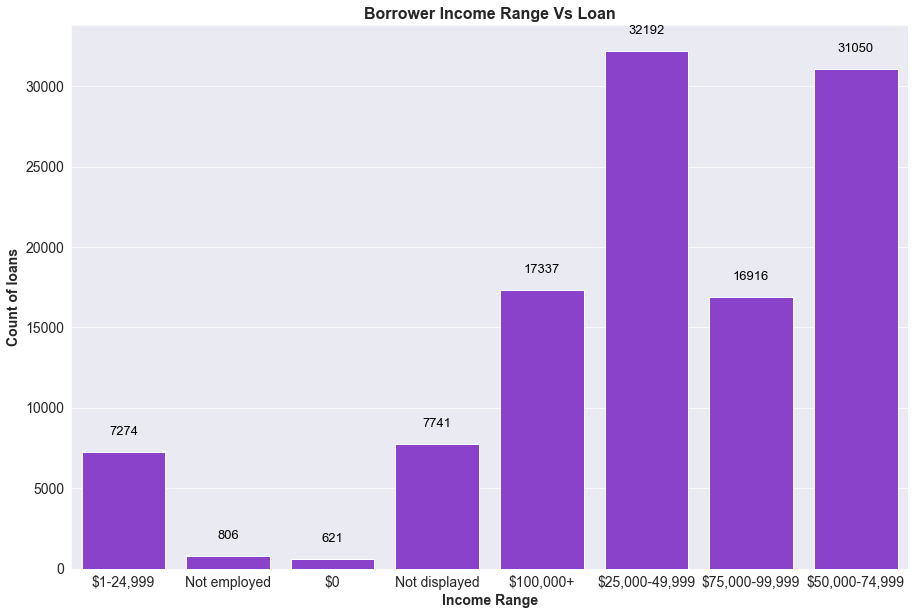

In [22]:
plt.subplots(figsize=(15,10))
sns.set_palette("bright")
ax=sns.barplot(cat_loan.IncomeRange.value_counts(sort=False, dropna=False).index, cat_loan.IncomeRange.value_counts(sort=False,dropna=False), color=sns.color_palette()[4])
plt.title('Borrower Income Range Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Income Range',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')


- Borrowers Income range follows a normal distribution, where most of the borrowers have Income in the range \\$25000 - \\$75000

#### Numerical Variables:

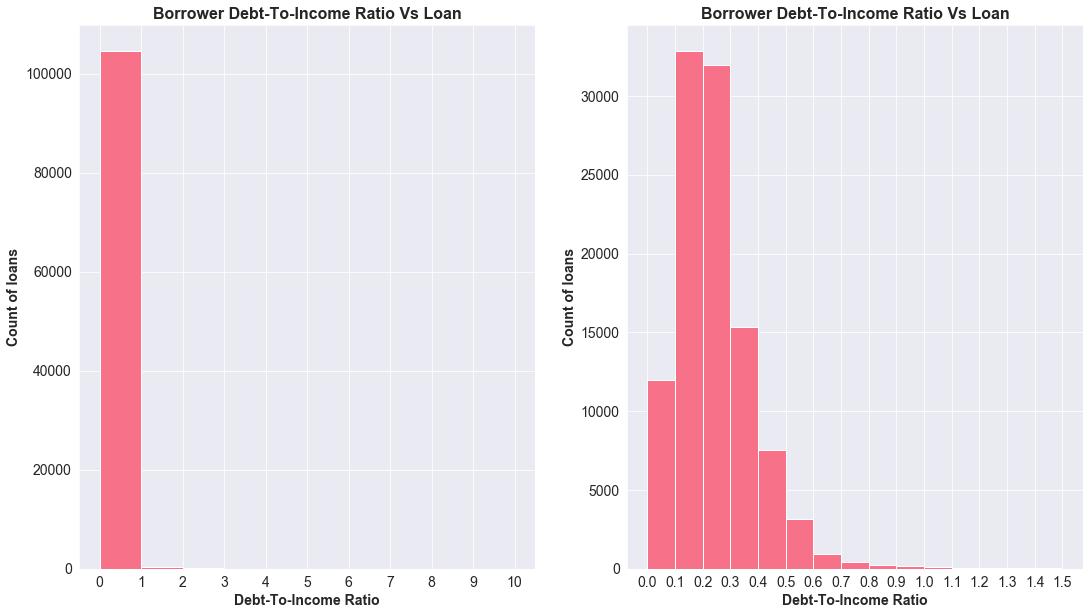

In [23]:
plt.subplots(figsize=(18,10))
sns.set_palette("husl")


plt.subplot(1,2,1)
bin_edges = np.arange(0, num_loan['DebtToIncomeRatio'].max()+0.1, 1)
plt.hist(data=num_loan, x='DebtToIncomeRatio', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['DebtToIncomeRatio'].max()+0.1, 1),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Borrower Debt-To-Income Ratio Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Debt-To-Income Ratio',  fontsize=14,fontweight='bold')

plt.subplot(1,2,2)
bin_edges = np.arange(0, 1.6, 0.1)
plt.hist(data=num_loan, x='DebtToIncomeRatio', bins=bin_edges);
plt.xticks(np.arange(0, 1.6, 0.1),fontsize=14) 
plt.yticks(fontsize=14);
plt.title('Borrower Debt-To-Income Ratio Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Debt-To-Income Ratio',  fontsize=14,fontweight='bold');

- Borrower's Debt to Income ratio gives a long tail for the values between 0 to 1, i.e most of the borrowers have low debt to income ratio. Zooming into the range 0 to 1, we see a right skewed distribution, with most of the borrowers having debt to income ratio of less than 0.5

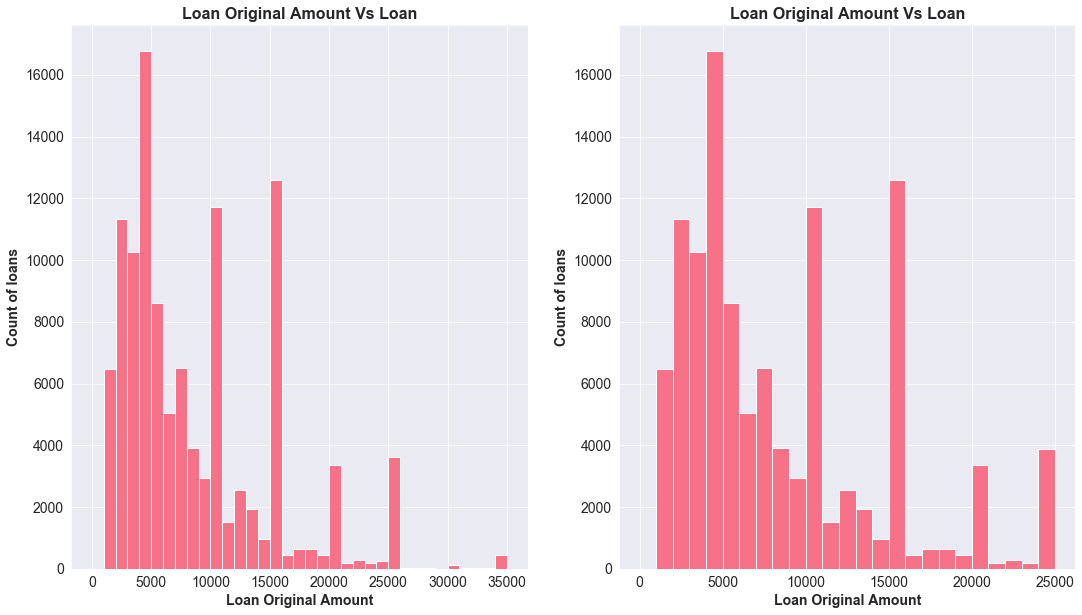

In [24]:
plt.subplots(figsize=(18,10))
sns.set_palette("husl")


plt.subplot(1,2,1)
bin_edges = np.arange(0, num_loan['LoanOriginalAmount'].max()+1000,1000)
plt.hist(data=num_loan, x='LoanOriginalAmount', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['LoanOriginalAmount'].max()+1000, 5000),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Loan Original Amount Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Loan Original Amount',  fontsize=14,fontweight='bold');

plt.subplot(1,2,2)
bin_edges = np.arange(0, 25000+1000,1000)
plt.hist(data=num_loan, x='LoanOriginalAmount', bins=bin_edges);
plt.xticks(np.arange(0, 25000+1000, 5000),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Loan Original Amount Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Loan Original Amount',  fontsize=14,fontweight='bold');

- Most of the loan amounts are around \\$5000 followed by \\$10,000, \\$15,000, \\$20,000 and \\$25,000.

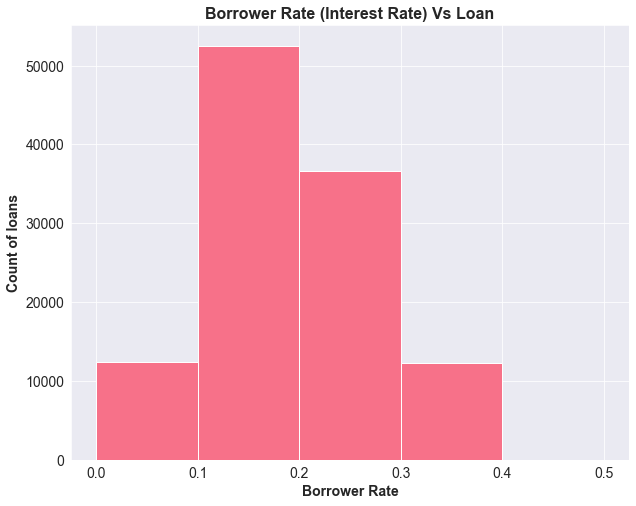

In [25]:
plt.subplots(figsize=(10,8))
sns.set_palette("husl")

bin_edges = np.arange(0, num_loan['BorrowerRate'].max()+0.1,0.1)
plt.hist(data=num_loan, x='BorrowerRate', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['BorrowerRate'].max()+0.1, 0.1),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Borrower Rate (Interest Rate) Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Borrower Rate',  fontsize=14,fontweight='bold');

- Borrower Rate seems to follow a unimodal distribution with most of the rate being under 0.1 to 0.3

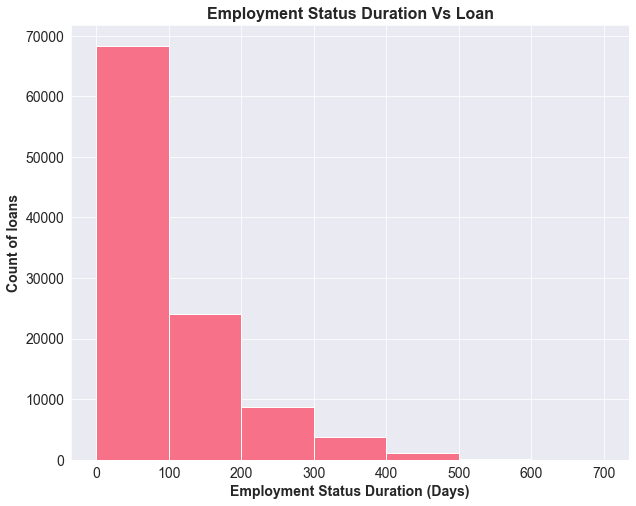

In [26]:
plt.subplots(figsize=(10,8))
sns.set_palette("husl")

bin_edges = np.arange(0, num_loan['EmploymentStatusDuration'].max()+10, 100)
plt.hist(data=num_loan, x='EmploymentStatusDuration', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['EmploymentStatusDuration'].max()+10, 100),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Employment Status Duration Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Employment Status Duration (Days)',  fontsize=14,fontweight='bold');

- Most of the borrowers have been employed for less than 3 months. 

In [27]:
#let's get an idea of StatedMonthlyIncome of the borrowers.
num_loan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

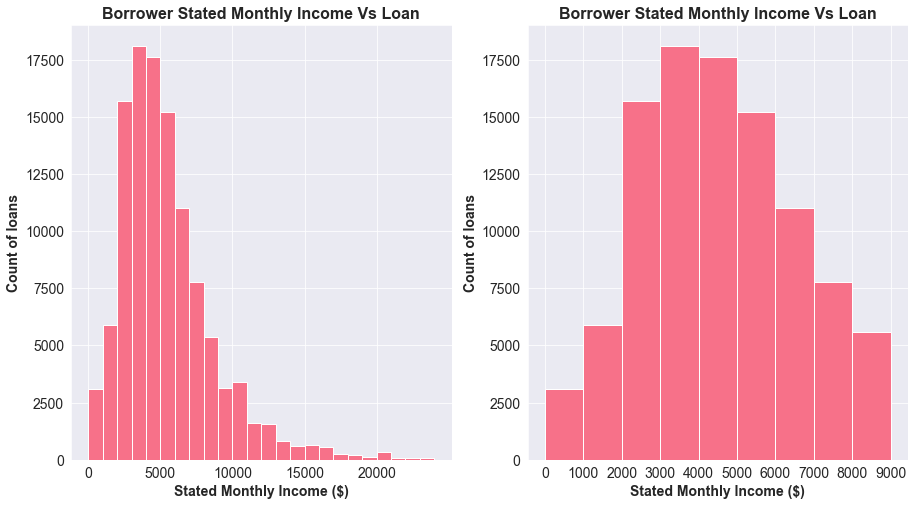

In [28]:
plt.subplots(figsize=(15,8))
sns.set_palette("husl")
plt.subplot(1,2,1)

bin_edges = np.arange(0, 25000, 1000)
plt.hist(data=num_loan, x='StatedMonthlyIncome', bins=bin_edges);
plt.xticks(np.arange(0, 25000, 5000),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Borrower Stated Monthly Income Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Stated Monthly Income ($)',  fontsize=14,fontweight='bold');


plt.subplot(1,2,2)
bin_edges = np.arange(0, 10000, 1000)
plt.hist(data=num_loan, x='StatedMonthlyIncome', bins=bin_edges);
plt.xticks(np.arange(0, 10000, 1000),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Borrower Stated Monthly Income Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Stated Monthly Income ($)',  fontsize=14,fontweight='bold');

- Apart from few outliers at, most of the borrowers have stated monthly income in the range \\$0 - \\$10,000 with the peak at around \\$5000.  

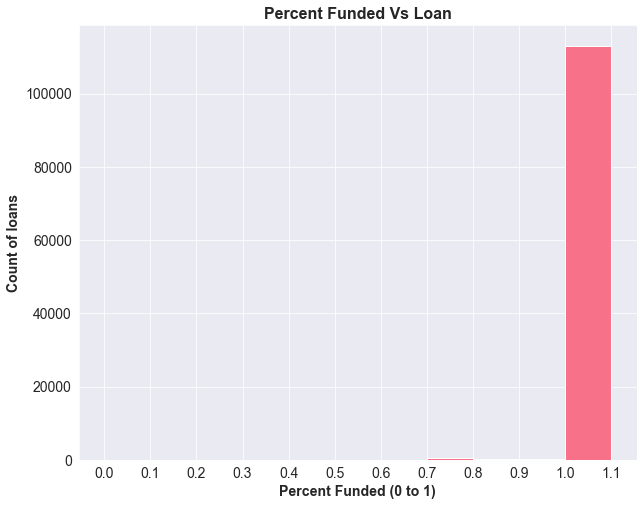

In [29]:
plt.subplots(figsize=(10,8))
sns.set_palette("husl")

bin_edges = np.arange(0, num_loan['PercentFunded'].max()+0.1, 0.1)
plt.hist(data=num_loan, x='PercentFunded', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['PercentFunded'].max()+0.1, 0.1),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Percent Funded Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Percent Funded (0 to 1)',  fontsize=14,fontweight='bold');

- Almost all of the loans filed have been funed. 

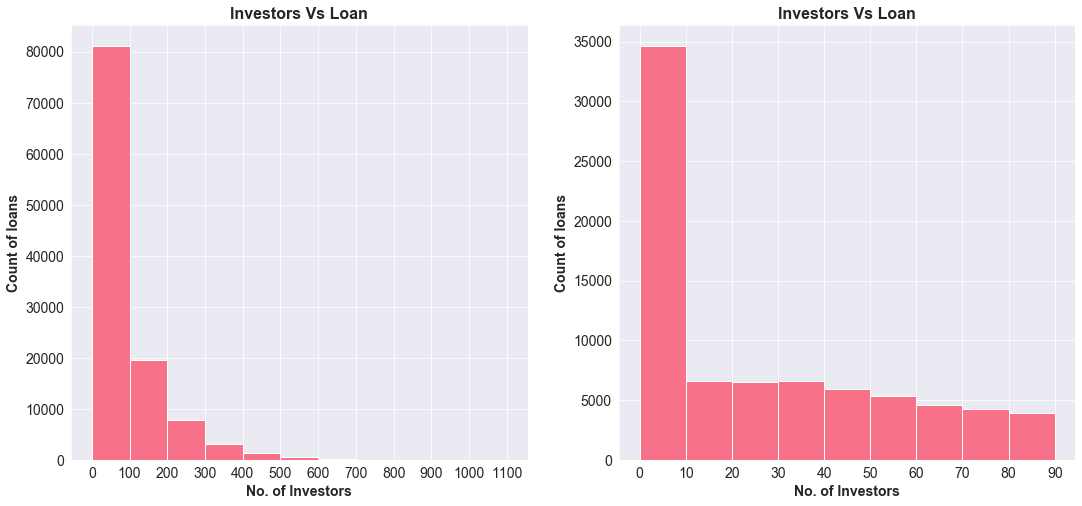

In [30]:
plt.subplots(figsize=(18,8))
sns.set_palette("husl")

plt.subplot(1,2,1)
bin_edges = np.arange(0, num_loan['Investors'].max()+10, 100)
plt.hist(data=num_loan, x='Investors', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['Investors'].max()+10, 100),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Investors Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('No. of Investors',  fontsize=14,fontweight='bold');

plt.subplot(1,2,2)
bin_edges = np.arange(0, 100, 10)
plt.hist(data=num_loan, x='Investors', bins=bin_edges);
plt.xticks(np.arange(0, 100, 10),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Investors Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('No. of Investors',  fontsize=14,fontweight='bold');

- Most of the loans get funded by at least 100 Investors, and in that most receive participation by at least 10 investors.

**Listing category as selected by the borrower at the time of listing, can be one of the below:**
<br>

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

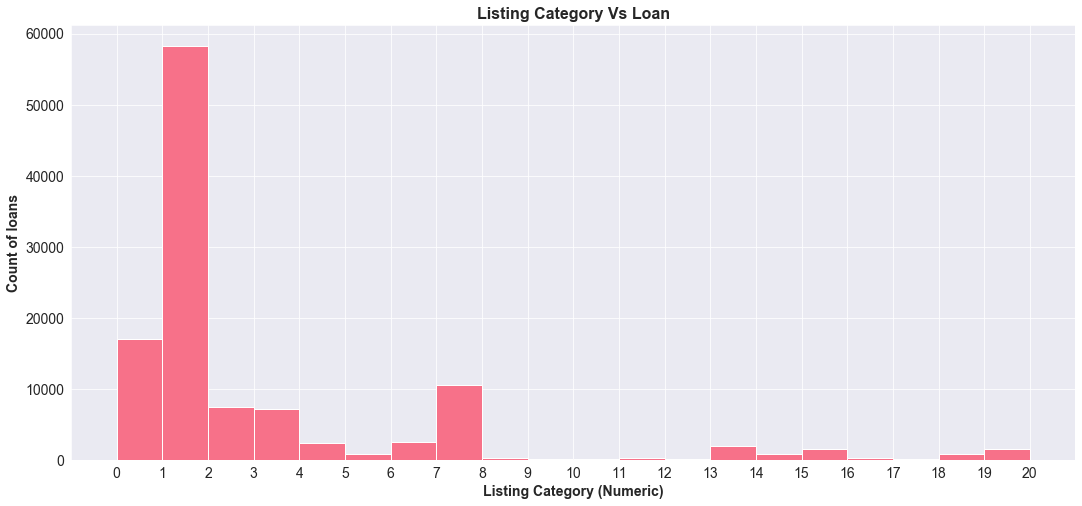

In [31]:
plt.subplots(figsize=(18,8))
sns.set_palette("husl")

bin_edges = np.arange(0, num_loan['ListingCategoryNumeric'].max()+1, 1)
plt.hist(data=num_loan, x='ListingCategoryNumeric', bins=bin_edges);
plt.xticks(np.arange(0, num_loan['ListingCategoryNumeric'].max()+1, 1),fontsize=14); 
plt.yticks(fontsize=14);
plt.title('Listing Category Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Listing Category (Numeric)',  fontsize=14,fontweight='bold');

- Most selected category for listing is Debt consolidation i.e people are taking loans to pay off their one or many other loans. 

#### Boolean Variables:

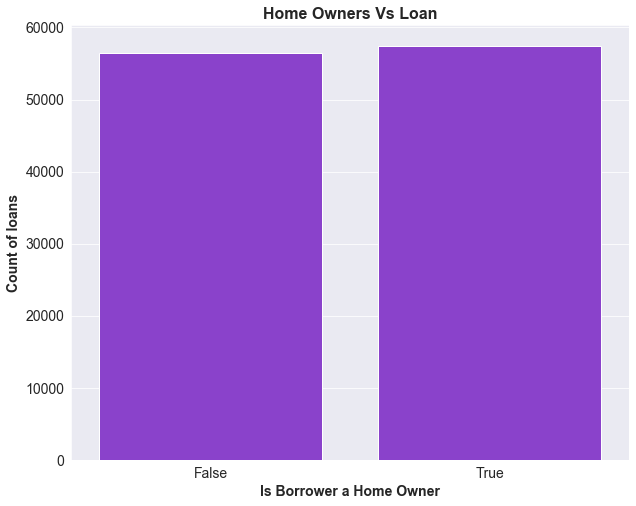

In [32]:
plt.subplots(figsize=(10,8))
sns.set_palette("bright")

ax=sns.barplot(bool_loan.IsBorrowerHomeowner.value_counts(sort=False, dropna=False).index, bool_loan.IsBorrowerHomeowner.value_counts(sort=False,dropna=False), color=sns.color_palette()[4])
plt.title('Home Owners Vs Loan', fontsize=16,fontweight='bold')
plt.ylabel('Count of loans', fontsize=14,fontweight='bold')
plt.xlabel('Is Borrower a Home Owner',  fontsize=14,fontweight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14);

- We have a very even distribution for borrowers being a homeowner or not. This suggests that loan distribution doesn't depend on homeownership status of the borrower. 

### Univariate Insights:

- Most of the loans has term of 36 months.
- Although, a good no. of loans have been completed, most are still are current.
- Among the rated loans, A, B, C and D ratings are most prevalent.
- Notably, most of the borrowers live in CA, followed by TX, NY, FL and IL.
- Most of the borrowers fall under Others category though a many of them have said they're professional.
- Most of the borrowers are employed and only a few hundreds are unemployed, which is a healthy sign.
- Borrowers Income range follows a normal distribution, where most of the borrowers have Income in the range \\$25000 - \\$75000
- Borrower's Debt to Income ratio gives a long tail for the values between 0 to 1, i.e most of the borrowers have low debt to income ratio. Zooming into the range 0 to 1, we see a right skewed distribution, with most of the borrowers having debt to income ratio of less than 0.5
- Most of the loan amounts are around \\$5000 followed by \\$10,000, \\$15,000, \\$20,000 and \\$25,000.
- Borrower Rate seems to follow a unimodal distribution with most of the rate being under 0.1 to 0.3
- Most of the borrowers have been employed for less than 3 months.
- Apart from few outliers at, most of the borrowers have stated monthly income in the range \\$0 - \\$10,000 with the peak at around \\$5000.
- Most of the loans get funded by at least 100 Investors, and in that most receive participation by at least 10 investors.
- Most selected category for listing is Debt consolidation i.e people are taking loans to pay off their one or many other loans.
- We have a very even distribution for borrowers being a homeowner or not. This suggests that loan distribution doesn't depend on homeownership status of the borrower.

### Bivariate Analysis:

<Figure size 720x720 with 0 Axes>

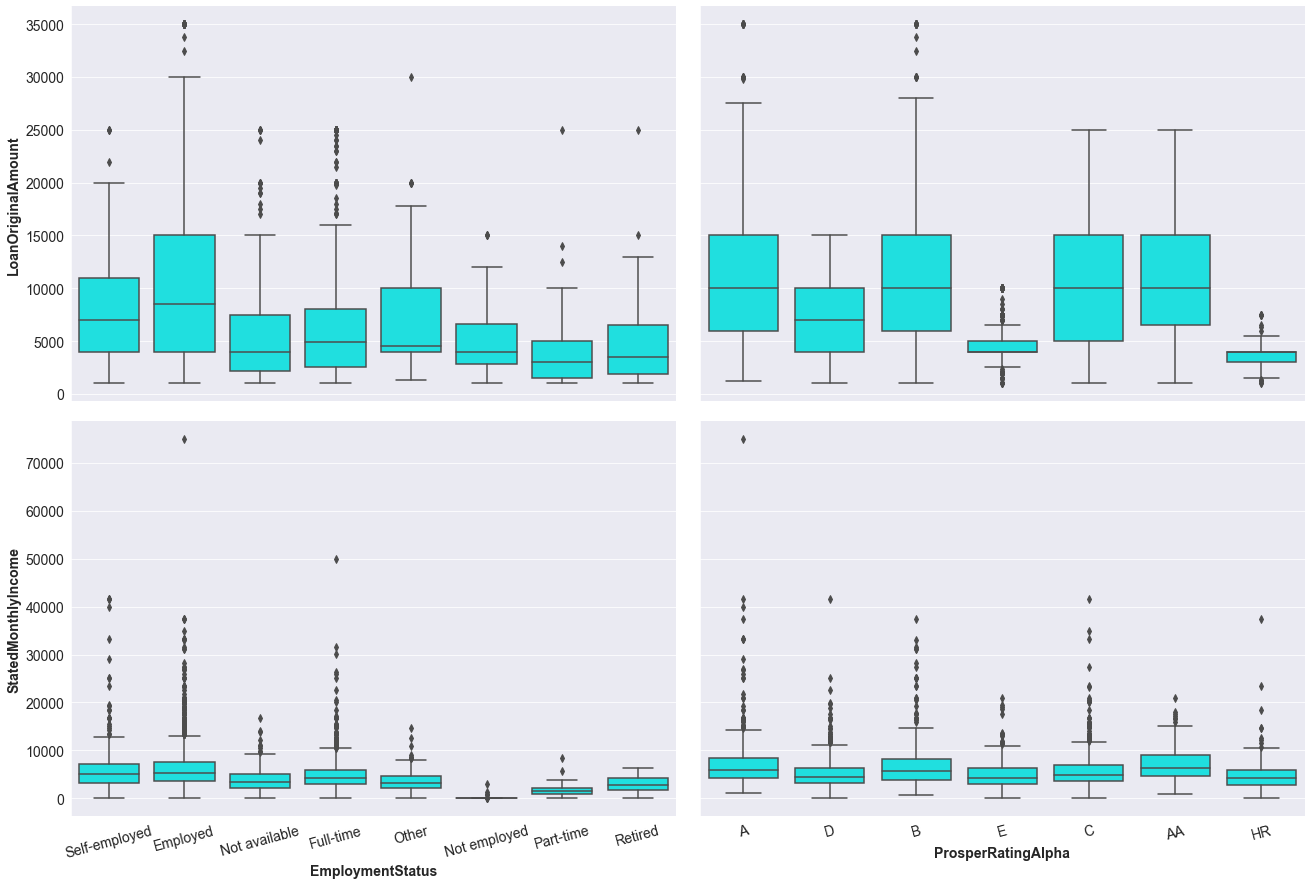

In [35]:
# plotting a matrix of numeric variable against categorical variables with a small data sample .

def boxgrid(x, y, **kwargs):
    sns.boxplot(x, y, color = 'cyan')
    plt.xticks(fontsize=14,rotation = 15) 
    plt.yticks(fontsize=14)
    plt.ylabel('x',fontsize=14,fontweight='bold')
    plt.xlabel('x',fontsize=14,fontweight='bold')

 
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan[0:5000], y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = ['EmploymentStatus', 'ProsperRatingAlpha'], height = 6, aspect = 1.5)

g.map(boxgrid);

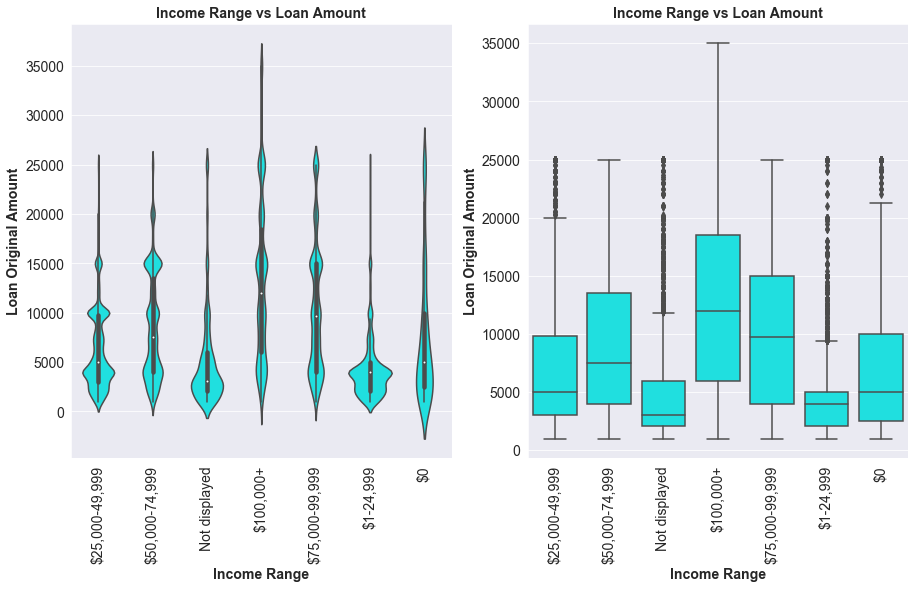

In [146]:
plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = loan[loan['IncomeRange'] != 'Not employed'], x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'cyan')
plt.xticks(fontsize=14,rotation = 90);
plt.title('Income Range vs Loan Amount',fontsize=14,fontweight='bold')
plt.yticks(fontsize=14);
plt.xlabel('Income Range',fontsize=14,fontweight='bold')
plt.ylabel('Loan Original Amount',fontsize=14,fontweight='bold')

plt.subplot(1, 2, 2)
sns.boxplot(data = loan[loan['IncomeRange'] != 'Not employed'], x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'cyan')
plt.xticks(fontsize=14,rotation = 90);
plt.title('Income Range vs Loan Amount',fontsize=14,fontweight='bold')
plt.yticks(fontsize=14);
plt.xlabel('Income Range',fontsize=14,fontweight='bold')
plt.ylabel('Loan Original Amount',fontsize=14,fontweight='bold');

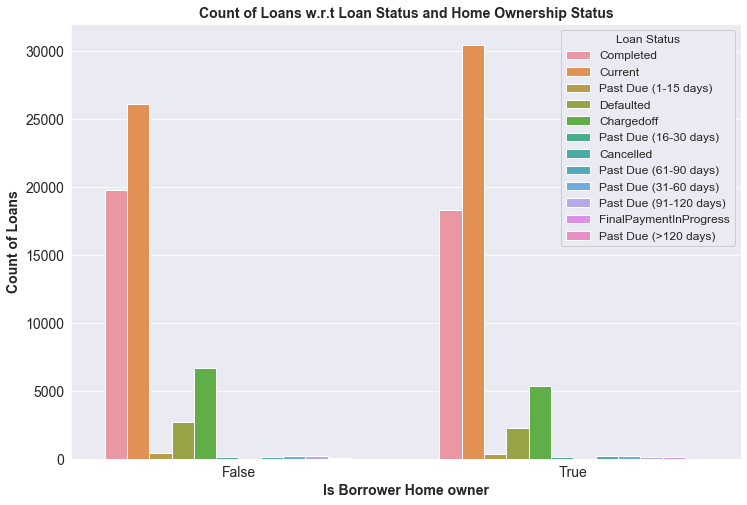

In [82]:
plt.figure(figsize = [12, 8])

ax=sns.countplot(data = loan, hue = 'LoanStatus', x = 'IsBorrowerHomeowner');
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Loan Status',fontsize=12, title_fontsize=12);
plt.title('Count of Loans w.r.t Loan Status and Home Ownership Status',fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.xlabel('Is Borrower Home owner',fontsize=14,fontweight='bold')
plt.ylabel('Count of Loans',fontsize=14,fontweight='bold');

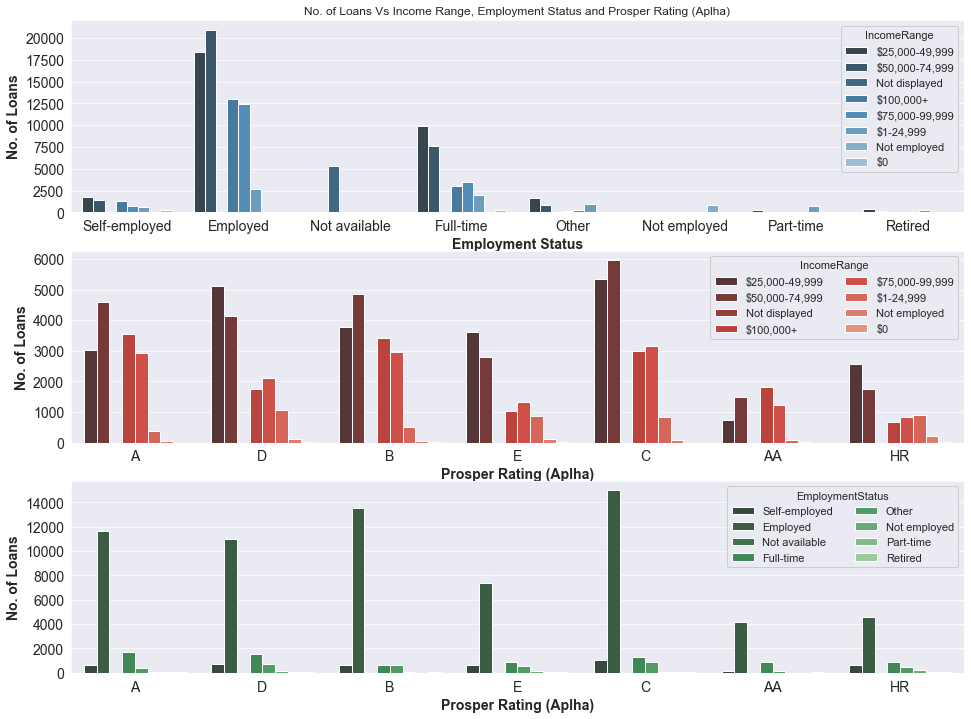

In [100]:
plt.figure(figsize = [16, 12])

plt.subplot(3, 1, 1)
ax=sns.countplot(data = loan, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues_d')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'IncomeRange',fontsize=11, title_fontsize=11);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('No. of Loans', fontsize=14, fontweight='bold')
plt.xlabel('Employment Status', fontsize=14, fontweight='bold')
plt.title('No. of Loans Vs Income Range, Employment Status and Prosper Rating (Aplha)',fontsize=14, fontweight='bold')

ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan, x = 'ProsperRatingAlpha', hue = 'IncomeRange', palette = 'Reds_d')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'IncomeRange',fontsize=11, title_fontsize=11);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('No. of Loans', fontsize=14, fontweight='bold')
plt.xlabel('Prosper Rating (Aplha)', fontsize=14, fontweight='bold')


ax = plt.subplot(3, 1, 3)
sns.countplot(data = loan, x = 'ProsperRatingAlpha', hue = 'EmploymentStatus', palette = 'Greens_d')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'EmploymentStatus',fontsize=11, title_fontsize=11);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('No. of Loans', fontsize=14, fontweight='bold')
plt.xlabel('Prosper Rating (Aplha)', fontsize=14, fontweight='bold');

### Bivariate Insights:

- Borrowers who take the highest loan amount are employed ones, followed by Self-employed, Others and Full-time employees.
- Stated monthly salary of the the borrowers who are employed is higher among all. 
- Loan amount is higher among all for loans with Prosper Rating A and B. 
- Loan amount and income range follow the expected trend that borrowers with higher income range are picking up loans with higher amount.
- Borrowers who are home owners have slightly more loans marked as completed than the borrowers who don't own a home.
- Most of the loans are taken by the employed borrowers who have income in the range of \\$25,000 - \\$75,000
- Highest no. of loans are bagged by the borrowers who are employed and have income range in \\$50,000 - \\$75,000 and have Prosper Rating as 'C'.

### Multivariate Analysis:

#### How all the variables of a loan are co-related?

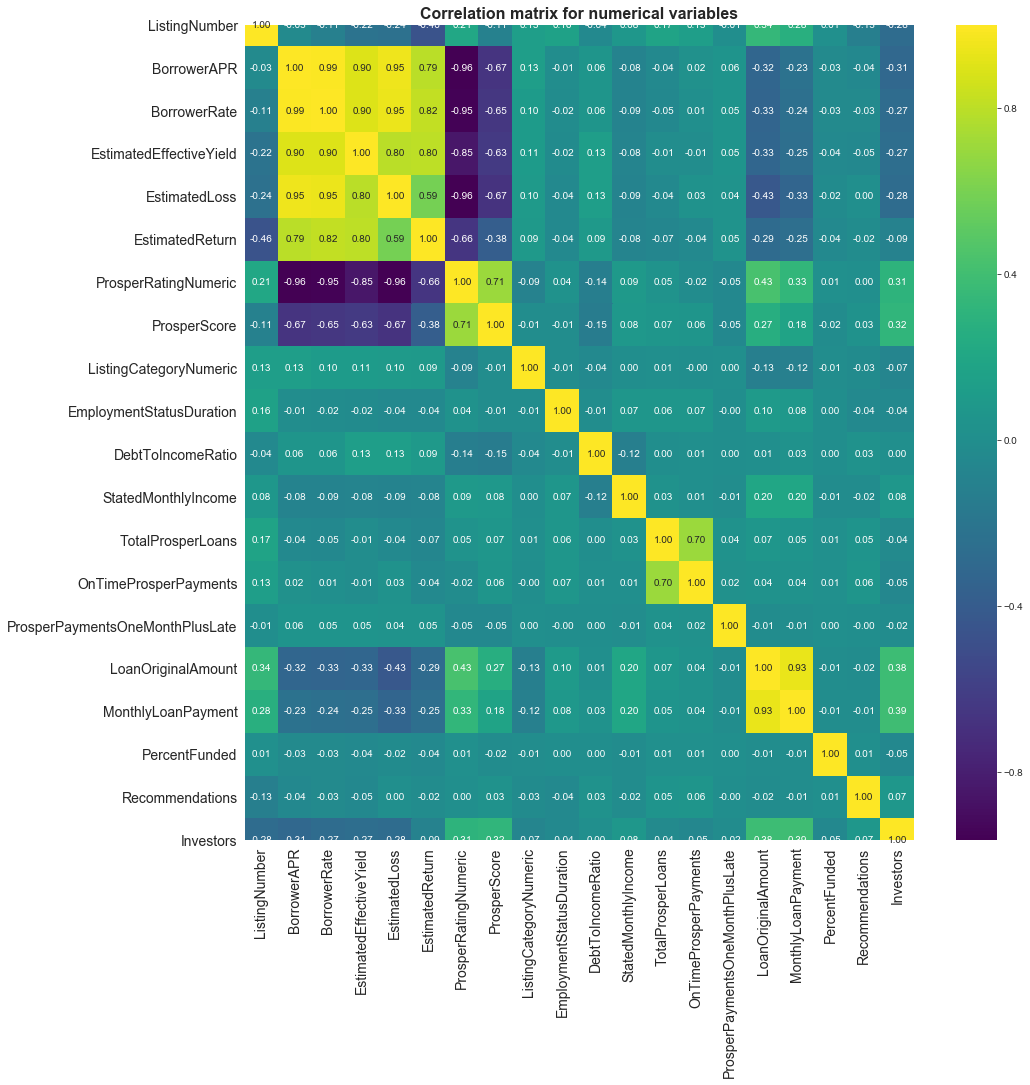

In [129]:
plt.subplots(figsize=(15,15))

sns.heatmap(num_loan.corr(), annot = True, fmt = '.2f', cmap = 'viridis');
plt.title('Correlation matrix for numerical variables', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14);

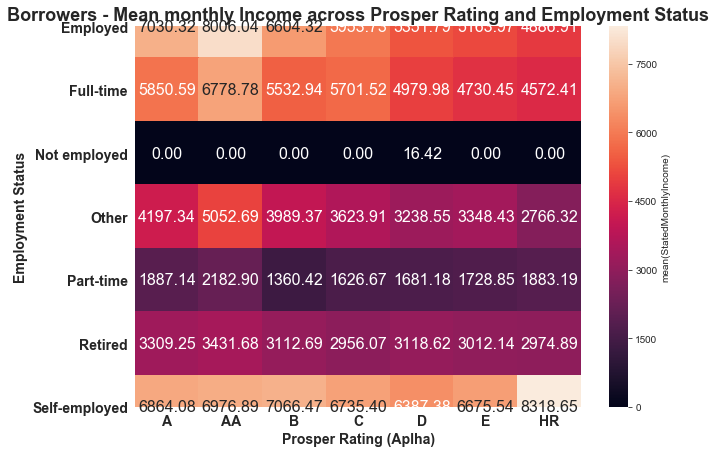

In [132]:
plt.figure(figsize = [15, 10])


cat_means = loan.groupby(['ProsperRatingAlpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRatingAlpha',
                            values = 'StatedMonthlyIncome_avg')
sns.heatmap(cat_means, annot = True,annot_kws={"fontsize":16}, fmt = '.2f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Borrowers - Mean monthly Income across Prosper Rating and Employment Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold') 
plt.yticks(fontsize=14, rotation =0, fontweight='bold')
plt.ylabel('Employment Status', fontsize=14, fontweight='bold')
plt.xlabel('Prosper Rating (Aplha)', fontsize=14, fontweight='bold');

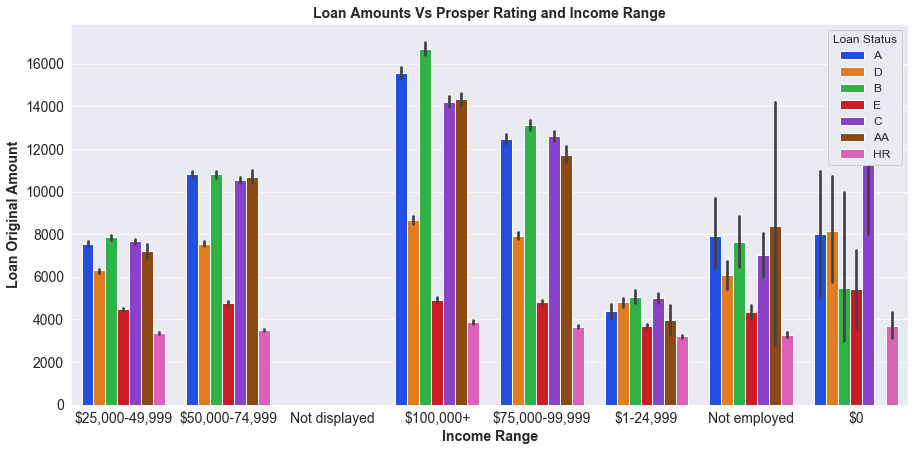

In [135]:
plt.figure(figsize = [15, 7])

ax=sns.barplot(data = loan, hue = 'ProsperRatingAlpha', x = 'IncomeRange', y = 'LoanOriginalAmount');
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Loan Status',fontsize=12, title_fontsize=12);
plt.title('Loan Amounts Vs Prosper Rating and Income Range',fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.xlabel('Income Range',fontsize=14,fontweight='bold')
plt.ylabel('Loan Original Amount',fontsize=14,fontweight='bold');

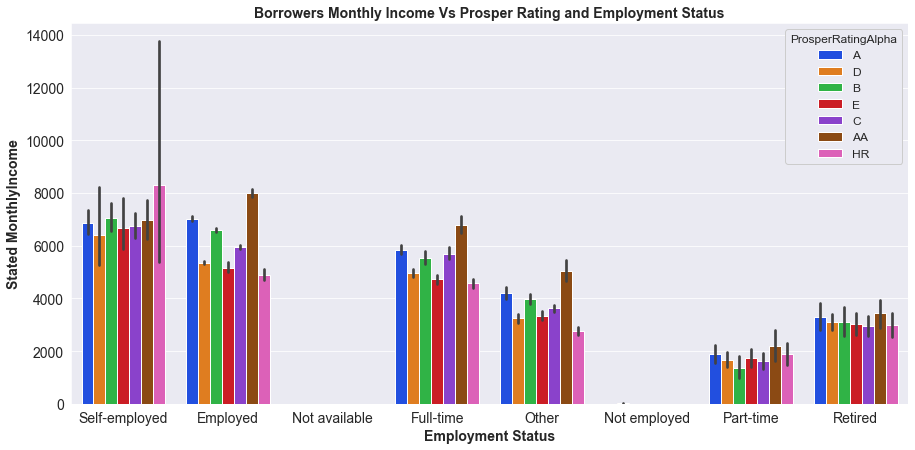

In [142]:
plt.figure(figsize = [15, 7])
ax = sns.barplot(data = loan, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRatingAlpha')
plt.title('Borrowers Monthly Income Vs Prosper Rating and Employment Status',fontsize=14,fontweight='bold')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'ProsperRatingAlpha',fontsize=12, title_fontsize=12);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.xlabel('Employment Status',fontsize=14,fontweight='bold')
plt.ylabel('Stated MonthlyIncome',fontsize=14,fontweight='bold');

### Multivariate Insights:

- Loan original amount and monthly loan payment is highly correlated and it is expected and borrowers interest rate and proper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.
- Borrowers with prosper ratings from AA to D have the higher loan amount with increased salary
- Borrowers who are employed or full time employees have higher mean salaries.
- Most Borrowers have Prosper rating of B, irrespective of their income range except for the people with zero income.
- The monthly income of borrowers is highest for self-employed followed by employed, full-time and others.
- So, the main contributing factors for the loan grant is heavily dependent on borrower's information like IncomeRange, Home ownership status and employment status and employment duration too.